In [ ]:
#Importacion bibliotecas

import numpy as np
import copy
import re
import math
import time

from random import shuffle

In [2]:
#Importacion y tratamientos de txt

def orders_splitting(data, v_t):
    p = r'[\d]+[.,\d]+|[\d]*[.][\d]+|[\d]+'
    l = r'[a-zA-Z]+'
    i = 0
    for text in data:
        if text == '-':
            i += 1
            continue
        data[i] = text.split("+")
        i += 1
    i = 0
    for orders in data:
        if orders == '-':
            i += 1
            continue
        j = 0
        for order in orders:
            quantity = re.findall(p, order)
            if len(quantity) == 0:
                quantity = ['1']
            type = re.findall(l, order)
            data[i][j] = [int(quantity[0]), ord(type[0]) - 65]
            j += 1
        i += 1
    cont = 0
    for i in data:
        if i == '-':
            cont += 1
            continue
        t_l = 0
        t_w = 0
        for j in i:
            t_l += j[0] * v_t[1][j[1]] / 1000
            t_w += j[0] * v_t[4][j[1]] / 1000
        data[cont] = [t_l, t_w]
        cont += 1
    return data


t_v_d = []  # Transport Vehicle Data
file = open("data/vehicle_data1.txt", 'r')

contents = file.read()
transport_VT = []
vehicle_typenum = []
loading_lenght = []
loading_widht = []
loading_height = []
loading_weight = []
fixed_cost = []
selfweight = []

for line in contents.split('\n'):
    row = line.split(' ')
    transport_VT.append(int(row[0]))
    vehicle_typenum.append(int(row[1]))
    loading_lenght.append(float(row[2]))
    loading_widht.append(float(row[3]))
    loading_height.append(float(row[4]))
    loading_weight.append(float(row[5]))
    fixed_cost.append(int(row[6]))
    selfweight.append(float(row[7]))

t_v_d.append(transport_VT)
t_v_d.append(vehicle_typenum)
t_v_d.append(loading_lenght)
t_v_d.append(loading_widht)
t_v_d.append(loading_height)
t_v_d.append(loading_weight)
t_v_d.append(fixed_cost)
t_v_d.append(selfweight)

f_v_i = [] # Finished Vehicle Data
file = open("data/FinishVehicle_data1.txt", 'r')

contents = file.read()
parameter = []
lenght = []
width = []
height = []
weight = []

for line in contents.split('\n'):
    row = line.split(' ')
    parameter.append(row[0])
    lenght.append(float(row[1]))
    width.append(float(row[2]))
    height.append(float(row[3]))
    weight.append(float(row[4]))

f_v_i.append(parameter)
f_v_i.append(lenght)
f_v_i.append(width)
f_v_i.append(height)
f_v_i.append(weight)

#print('fvi1', f_v_i)

"""f_v_i = []  # Finished vehicle information
f_v_i.append(['Type A', 'Type B', 'Type C', 'Type D', 'Type E'])  # Parameter
f_v_i.append([3.460E+3, 4.135E+3, 4.350E+3, 4.515E+3, 4.865E+3])  # Length (mm)
f_v_i.append([1.690E+3, 1.828E+3, 1.855E+3, 1.880E+3, 1.895E+3])  # Width (mm)
f_v_i.append([1.450E+3, 1.485E+3, 1.550E+3, 1.550E+3, 1.730E+3])  # Height (mm)
f_v_i.append([8.700E+2, 1.225E+3, 1.270E+3, 1.320E+3, 1.645E+3])  # Weight (kg)"""

#print('fvi2', f_v_i)

c_o_i_t_w = []  # Customer orders information with time windowss
file = open("data/customer_order1.txt", 'r')

# Read the contents of the file
contents = file.read()
labels = []
latitude = []
longitude = []
earliest_time = []
latest_time = []
orders = []

for line in contents.split('\n'):
    row = line.split(' ')
    labels.append(row[0])
    latitude.append(float(row[1]))
    longitude.append(float(row[2]))
    if row[3] == '-':
        row[3] = '-'
    else:
        row[3] = int(row[3])
    earliest_time.append(row[3])
    if row[4] == '-':
        row[4] = '-'
    else:
        row[4] = int(row[4])
    latest_time.append(row[4])
    orders.append(row[5])

c_o_i_t_w.append(labels)
c_o_i_t_w.append(latitude)
c_o_i_t_w.append(longitude)
c_o_i_t_w.append(earliest_time)
c_o_i_t_w.append(latest_time)
#print("a",orders)
#print("a",f_v_i)
c_o_i_t_w.append(orders_splitting(orders, f_v_i))

#print('coitw',c_o_i_t_w[5])

p_o_m = [] # Parameter used
file = open("data/model_parameters1.txt", 'r')

contents = file.read()
kmton_cost = 0
speed = 0
oil_price = 0
emission_index = 0
road_condition = 0
fuel_CEmission = 0
carbon_tax = 0
service_time = 0
time_penalty = 0
weight_factor = 0

for line in contents.split('\n'):
    row = line.split(' ')
    kmton_cost = float(row[0])
    speed = int(row[1])
    oil_price = float(row[2])
    emission_index = float(row[3])
    road_condition = float(row[4])
    fuel_CEmission = float(row[5])
    carbon_tax = float(row[6])
    service_time = int(row[7])
    time_penalty = int(row[8])
    weight_factor = int(row[9])

p_o_m.append(kmton_cost)
p_o_m.append(speed)
p_o_m.append(oil_price)
p_o_m.append(emission_index)
p_o_m.append(road_condition)
p_o_m.append(fuel_CEmission)
p_o_m.append(carbon_tax)
p_o_m.append(service_time)
p_o_m.append(time_penalty)
p_o_m.append(weight_factor)

#print('pom:',p_o_m)

pop_data = [] # Data Poblation
file = open("data/pop_data1.txt", 'r')

contents = file.read()
popsize = 0
cross_prob = 0
muta_prob = 0
gen_max = 0

for line in contents.split('\n'):
    row = line.split(' ')
    popsize = int(row[0])
    cross_prob = float(row[1])
    muta_prob = float(row[2])
    gen_max = int(row[3])

pop_data.append(popsize)
pop_data.append(cross_prob)
pop_data.append(muta_prob)
pop_data.append(gen_max)

#print(pop_data)


In [3]:
#Haversine

def haversine(lat1, lon1, lat2, lon2):
    # Radio de la Tierra en kilómetros
    R = 6371.0

    # Convierte las coordenadas de grados a radianes
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    # Diferencia de latitud y longitud
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Fórmula de Haversine
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Distancia en kilómetros
    distance = R * c

    return distance


"""# Coordenadas proporcionadas
lat1 = 28.68  # Latitud de la primera ubicación
lon1 = 115.68  # Longitud de la primera ubicación
lat2 = 29.27  # Latitud de la segunda ubicación
lon2 = 117.17  # Longitud de la segunda ubicación

# Calcular la distancia utilizando la función haversine
distance = haversine(lat1, lon1, lat2, lon2)
print("La distancia entre las dos ubicaciones es:", distance, "kilómetros")

cords = [   ]
cords.append([28.68, 29.27, 28.26, 28.46, 27.95, 30.12, 28.94, 30.67, 30.20, 29.08, 30.39, 30.60, 30.93, 29.85, 29.36, 28.56, 29.70, 28.23, 27.83, 27.63, 27.82, 27.12])                                                #Latitude
cords.append([115.68, 117.17, 117.07, 117.95, 116.36, 118.16, 118.88, 117.49, 115.05, 119.65, 114.90, 114.30, 113.90, 114.30, 113.10, 112.30, 116.00, 112.90, 113.10, 113.80, 114.90, 115.00])                          #Longitude

i = 1
while i < len(cords[0]):
    print("distancia: ",i,haversine(cords[0][0],cords[1][0],cords[0][i],cords[1][i]))
    print("tiempo:", haversine(cords[0][0],cords[1][0],cords[0][i],cords[1][i])/80)
    i+=1
print("-----------------")
print(haversine(cords[0][2],cords[1][2],cords[0][7],cords[1][7]))"""


'# Coordenadas proporcionadas\nlat1 = 28.68  # Latitud de la primera ubicación\nlon1 = 115.68  # Longitud de la primera ubicación\nlat2 = 29.27  # Latitud de la segunda ubicación\nlon2 = 117.17  # Longitud de la segunda ubicación\n\n# Calcular la distancia utilizando la función haversine\ndistance = haversine(lat1, lon1, lat2, lon2)\nprint("La distancia entre las dos ubicaciones es:", distance, "kilómetros")\n\ncords = [   ]\ncords.append([28.68, 29.27, 28.26, 28.46, 27.95, 30.12, 28.94, 30.67, 30.20, 29.08, 30.39, 30.60, 30.93, 29.85, 29.36, 28.56, 29.70, 28.23, 27.83, 27.63, 27.82, 27.12])                                                #Latitude\ncords.append([115.68, 117.17, 117.07, 117.95, 116.36, 118.16, 118.88, 117.49, 115.05, 119.65, 114.90, 114.30, 113.90, 114.30, 113.10, 112.30, 116.00, 112.90, 113.10, 113.80, 114.90, 115.00])                          #Longitude\n\ni = 1\nwhile i < len(cords[0]):\n    print("distancia: ",i,haversine(cords[0][0],cords[1][0],cords[0][i],cords[1]

In [4]:
#Declaracion de funciones

def timing(f):
    def wrap(*args, **kwargs):
        time1 = time.time()*1000.0
        ret = f(*args, **kwargs)
        time2 = time.time()
        #print('{:s} function took {:.3f} ms'.format(f.__name__, (time2-time1)*1000.0))

        return ret
    return wrap

def angle_between(p1, p2):
    ang1 = np.arctan2(*p1[::-1])
    ang2 = np.arctan2(*p2[::-1])
    return np.rad2deg((ang1 - ang2) % (2 * np.pi))

def coord():
    x_y = []
    for i in range(1, len(c_o_i_t_w[0])):
        x_y.append([c_o_i_t_w[1][i] - c_o_i_t_w[1][0], c_o_i_t_w[2][i] - c_o_i_t_w[2][0]])
    return x_y

def decision_x(pares_0, orden_vehiculos):
    pares = []
    if len(pares_0) == len(orden_vehiculos):
        for i in range(len(pares_0)):
            pares.append([pares_0[i], orden_vehiculos[i]])
    tipos = len(t_v_d[0])  # tipos = len(t_v_d[0])
    x = []
    uso = [0] * tipos
    while len(x) < len(orden_vehiculos):
        x.append(uso.copy())
    for i in range(tipos):
        for j in range(len(pares)):
            if pares[j][1] == i + 1:
                x[j][i] = 1
    return x

def decision_y(x, entre_0):
    tipos = len(t_v_d[0])  # tipos = len(t_v_d[0])
    y = []
    visitas = [0] * tipos
    while len(y) < len(c_o_i_t_w[0]) - 1:
        y.append(visitas.copy())
    for i in range(len(x)):
        for j in range(len(x[i])):
            if x[i][j] == 1:
                for cliente in entre_0[i]:
                    y[cliente - 1][j] = 1
    return y

def N_1():
    i = 1
    n1 = []
    dat = []
    temp = []
    coords = coord()

    for i in range(len(coords)):
        data = [angle_between([0, 0], coords[i]), i + 1]
        n1.append(data)
        i += 1
    shuffle(n1)

    for i in range(len(n1)):
        if n1[i][0] - n1[0][0] < 0:
            temp.append([n1[i][0] - n1[0][0] + 360, n1[i][1]])
        else:
            temp.append([n1[i][0] - n1[0][0], n1[i][1]])
    temp.sort()

    for i in range(len(temp)):
        temp[i] = temp[i][1]

    while len(dat) < len(n1):
        head = temp.pop(0)
        temp.append(head)
        temp_2 = temp.copy()
        dat.append(temp_2)

    temp = []
    for i in range(1, len(c_o_i_t_w[0])):
        temp.append(i)
    while len(dat) < pop_data[0]:
        temp = temp.copy()
        shuffle(temp)
        dat.append(temp)

    return dat

def N_2():
    dat = []
    for i in range(len(t_v_d[0])):
        if t_v_d[1][i] > 0:
            dat += [t_v_d[0][i]] * t_v_d[1][i]
    shuffle(dat)
    return dat

#Decodificador para visitas y regresos de vehiculos entre cantidad de clientes
def decodificar_pedidos(sin_modificar, N2, transportes, clientes):
    #Lista inicial para almacenar recorrido
    decodificado = [0]
    #Iterar sobre los vehiculos indicados en N2
    for vehicles in N2:
        temp_l = 0
        temp_w = 0
        #Iterar sobre los clientes en la lista sin modificar
        for cliente in sin_modificar:
            #Si el cliente ya pertenece al recorrdio se pasa al siguiente
            if cliente in decodificado:
                continue
            #Verificar si agregar al cliente excede las capacidades del vehiculo
            if temp_l + clientes[5][cliente][0] > transportes[2][vehicles - 1] or temp_w + clientes[5][cliente][1] > \
                    transportes[5][vehicles - 1]:
                #Si excede la capacidadse regresa al deposito y se rompe el ciclo
                decodificado.append(0)
                break
            #Actualizar cargas acumuladas con cliente actual
            temp_l += clientes[5][cliente][0]
            temp_w += clientes[5][cliente][1]
            decodificado.append(cliente)
            #Al llegar al ultimo cliente se agrega el deposito y se sale del ciclo
            if cliente == sin_modificar[-1]:
                decodificado.append(0)
                break
    #Verificacion de visitas a clientes
    if sin_modificar[-1] in decodificado:
        #Contador de cantidad de ceros en el recorrido
        ceros = 0
        for i in decodificado:
            if i == 0:
                ceros += 1
        return [sin_modificar,decodificado + [0] * (len(N2) - ceros + 1)]
    else:
        for i in sin_modificar:
            if i not in decodificado:
                decodificado.append(i)
        return [sin_modificar,decodificado]

#f_1(orden_v, pesos, distancias_por_porcion, entre_0)
def f_1(orden_vehiculos, pesos_por_trayecto, distancias_por_trayecto, entre_0):
    vehicle_type = 0.5 * 0.7 * 0.005 *1.2041 #0.005 es el area del camion al frente en m**2 y 1.2041 es la densidad del aire en kg/m**3
    pesos = copy.deepcopy(pesos_por_trayecto)
    trayectos = 0
    var_x = [[],[],[]]
    for trayecto in entre_0:
        if len(trayecto) > 0:
            trayectos += 1
    for i in range(len(orden_vehiculos)):
        if orden_vehiculos[i] == 1:
            var_x[0].append(1)
            var_x[1].append(0)
            var_x[2].append(0)
        elif orden_vehiculos[i] == 2:
            var_x[0].append(0)
            var_x[1].append(1)
            var_x[2].append(0)
        else:
            var_x[0].append(0)
            var_x[1].append(0)
            var_x[2].append(1)
    total = 0
    costo_kilometro = p_o_m[0]
    oil_price = p_o_m[2]
    road_condition_factor = p_o_m[4]
    emission_index_parameter = p_o_m[3]
    speed = p_o_m[1]
    for trayecto in range(trayectos):
        inicio = 0
        mitad = 0
        final = 0
        inicio = inicio + var_x[0][trayecto] * t_v_d[6][orden_vehiculos[trayecto] - 1]
        inicio = inicio + var_x[1][trayecto] * t_v_d[6][orden_vehiculos[trayecto] - 1]
        inicio = inicio + var_x[2][trayecto] * t_v_d[6][orden_vehiculos[trayecto] - 1]
        for porcion in range(len(pesos[trayecto])):
            peso_vehiculo = t_v_d[7][orden_vehiculos[trayecto] - 1]
            peso_carga = pesos[trayecto][porcion]
            distancia_trayecto = distancias_por_trayecto[trayecto][porcion]
            mitad += var_x[0][trayecto] * costo_kilometro * ( peso_vehiculo + peso_carga) * distancia_trayecto
            mitad += var_x[1][trayecto] * costo_kilometro * ( peso_vehiculo + peso_carga) * distancia_trayecto
            mitad += var_x[2][trayecto] * costo_kilometro * ( peso_vehiculo + peso_carga) * distancia_trayecto
            final += oil_price * (var_x[0][trayecto] * emission_index_parameter * (road_condition_factor * (peso_vehiculo + peso_carga) + vehicle_type * (speed ** 2)) * distancia_trayecto)
            final += oil_price * (var_x[1][trayecto] * emission_index_parameter * (road_condition_factor * (peso_vehiculo + peso_carga) + vehicle_type * (speed ** 2)) * distancia_trayecto)
            final += oil_price * (var_x[2][trayecto] * emission_index_parameter * (road_condition_factor * (peso_vehiculo + peso_carga) + vehicle_type * (speed ** 2)) * distancia_trayecto)
        total += inicio + mitad + final
    return total
#f_2(lista_sin_modificar, tiempos)
def f_2(lista_sin_modificar, tiempos):
    early = 0
    late = 0
    for i in range(len(tiempos)):
        early += max([c_o_i_t_w[3][lista_sin_modificar[i]] - tiempos[i], 0])
        late += max([tiempos[i] - c_o_i_t_w[4][lista_sin_modificar[i]], 0])
    return p_o_m[8] * early + p_o_m[8] * late
#f_3(orden_v, pesos, distancias)
def f_3(orden_vehiculos, pesos_por_trayecto, distancias_por_trayecto, entre_0):
    vehicle_type = 0.5 * 0.7 * 0.005 *1.2041 #0.005 es el area del camion al frente en m**2 y 1.2041 es la densidad del aire en kg/m**3
    pesos = copy.deepcopy(pesos_por_trayecto)
    var_x = [[], [], []]
    costo = 0
    suma = 0
    conversion_factor = p_o_m[5]
    carbon_tax = p_o_m[6]
    road_factor = p_o_m[4]
    emission_index = p_o_m[3]
    speed = p_o_m[1]

    trayectos = 0
    var_x = [[],[],[]]
    for trayecto in entre_0:
        if len(trayecto) > 0:
            trayectos += 1
    for i in range(len(orden_vehiculos)):
        if orden_vehiculos[i] == 1:
            var_x[0].append(1)
            var_x[1].append(0)
            var_x[2].append(0)
        elif orden_vehiculos[i] == 2:
            var_x[0].append(0)
            var_x[1].append(1)
            var_x[2].append(0)
        else:
            var_x[0].append(0)
            var_x[1].append(0)
            var_x[2].append(1)
    
    for trayecto in range(trayectos):
        suma = 0
        for porcion in range(len(pesos[trayecto])):
            peso_vehiculo = t_v_d[7][orden_vehiculos[trayecto] - 1]
            peso_carga = pesos[trayecto][porcion]
            distancia_trayecto = distancias_por_trayecto[trayecto][porcion]
            suma += carbon_tax * (conversion_factor * (var_x[0][trayecto] * emission_index * (road_factor * (peso_vehiculo + peso_carga) + vehicle_type * (speed ** 2)) * distancia_trayecto))
            suma += carbon_tax * (conversion_factor * (var_x[1][trayecto] * emission_index * (road_factor * (peso_vehiculo + peso_carga) + vehicle_type * (speed ** 2)) * distancia_trayecto))
            suma += carbon_tax * (conversion_factor * (var_x[2][trayecto] * emission_index * (road_factor * (peso_vehiculo + peso_carga) + vehicle_type * (speed ** 2)) * distancia_trayecto))
        costo += suma
    return costo

def fitness_total(toda_la_info):
    total = 0
    max = -1
    minimo = 99999999999
    for i in toda_la_info:
        if i > max:
            max = i
        if i < minimo:
            minimo = i
        total += i
    return [minimo, total / len(toda_la_info), max]

def cross_prob(fitness, f_avg, f_max):
    if fitness >= f_avg:
        return pop_data[1]
    return pop_data[1] * (f_max - f_avg) / (f_max - fitness)

def mut_prob(fitness, f_avg, f_max):
    if fitness >= f_avg:
        return pop_data[2]
    return pop_data[2] * (f_max - f_avg) / (f_max - fitness)

def codificado_real( listas_precodificado_codificado, orden_v):
    lista_sin_modificar = listas_precodificado_codificado[0]
    lista_pre_codificada = listas_precodificado_codificado[1]
    lat = c_o_i_t_w[1]
    long = c_o_i_t_w[2]
    pesos = []
    tiempos = []
    pares_0 = []
    entre_0 = []
    distancias = []
    posicion_ceros = []
    vehiculo = 0
    for i in range(len(lista_pre_codificada)):
        if lista_pre_codificada[i] == 0:
            posicion_ceros.append(i)
    for i in range(len(posicion_ceros) - 1):
        sublista = [posicion_ceros[i], posicion_ceros[i + 1]]
        pares_0.append(sublista)
    for par in pares_0:
        distancia = []
        aux = []
        w = []
        tiempo = []
        for j in range(par[0] + 1, par[1]):
            aux.append(lista_pre_codificada[j])
        for j in aux:
            w.append(c_o_i_t_w[5][j][1])
        for j in range(len(w)):
            w[j] = sum(w[j:])
        if len(aux) > 0:
            j = 0
            while j < len(aux):
                if j == 0:
                    distancia.append(haversine(lat[0], long[0], lat[aux[j]], long[aux[j]]))
                if 0 <= j < len(aux) - 1:
                    distancia.append(haversine(lat[aux[j + 1]], long[aux[j + 1]], lat[aux[j]], long[aux[j]]))
                if j == len(aux) - 1:
                    distancia.append(haversine(lat[0], long[0], lat[aux[j]], long[aux[j]]))
                j += 1
        for i in distancia:
            tiempo.append(i / p_o_m[1])

        tiempos.append(tiempo)
        distancias.append(distancia)
        entre_0.append(aux)
        if len(w) > 0:
            w.append(0)
        pesos.append(w)
        vehiculo += 1
    resto = 0
    temp = []
    for i in tiempos:
        if i == []:
            break
        while len(i) > 1:
            if resto > 0:
                temp.append(i.pop(0) + resto)
                resto = 0
            else:
                temp.append(i.pop(0))
        resto = i.pop(0)
    tiempos = copy.deepcopy(temp)
    temp = []
    resto = 0
    distancias_por_porcion = copy.deepcopy(distancias)
    for i in distancias:
        if i == []:
            break
        while len(i) > 1:
            if resto > 0:
                temp.append(i.pop(0) + resto)
                resto = 0
            else:
                temp.append(i.pop(0))
        resto = i.pop(0)
    distancias = copy.deepcopy(temp)
    fitness = f_1(orden_v, pesos, distancias_por_porcion, entre_0) + f_2(lista_sin_modificar, tiempos) + f_3(orden_v, pesos, distancias_por_porcion, entre_0)
    lista_codificada = [lista_sin_modificar, lista_pre_codificada, fitness, 0, 0, pares_0, entre_0, pesos, distancias, tiempos]
    return lista_codificada

def pmx_crossover(parent1, parent2):
    # original code https://observablehq.com/@swissmanu/pmx-crossover
    """
    Performs Partially Mapped Crossover (PMX) on two parent sequences.

    Args:
        parent1: The first parent sequence.
        parent2: The second parent sequence.

    Returns:
        A tuple containing two child sequences (offspring).

    Raises:
        ValueError: If the parents have different lengths.
    """

    if len(parent1) != len(parent2):
        raise ValueError("Parents must have the same length!")

    # Select random crossover points
    crossover_point1 = randint(0, len(parent1) - 2)
    crossover_point2 = randint(crossover_point1 + 1, len(parent1))

    # Create child sequences (shallow copies)
    child1 = parent1.copy()
    child2 = parent2.copy()

    # Mapping for repairs
    mapping1 = {parent2[i]: parent1[i] for i in range(crossover_point1, crossover_point2)}
    mapping2 = {parent1[i]: parent2[i] for i in range(crossover_point1, crossover_point2)}

    # Swap elements within the slice
    for i in range(crossover_point1, crossover_point2):
        child1[i] = parent2[i]
        child2[i] = parent1[i]

    # Repair lower and upper slices
    for i in range(crossover_point1):
        while child1[i] in mapping1:
            child1[i] = mapping1[child1[i]]
        while child2[i] in mapping2:
            child2[i] = mapping2[child2[i]]

    for i in range(crossover_point2, len(parent1)):
        while child1[i] in mapping1:
            child1[i] = mapping1[child1[i]]
        while child2[i] in mapping2:
            child2[i] = mapping2[child2[i]]
    child1 = [child1[:crossover_point1], child1[crossover_point1:crossover_point2], child1[crossover_point2:]]
    child1[1].reverse()
    child2 = [child2[:crossover_point1], child2[crossover_point1:crossover_point2], child2[crossover_point2:]]
    child2[1].reverse()
    return [child1[0] + child1[1] + child1[2], child2[0] + child2[1] + child2[2]]

#Funciones de Probabilidad

def seleccion(p_codificada: list):
    
    seleccionados = []

    temp = copy.deepcopy(p_codificada)
    for i in range(len(temp)):
        temp[i] = [temp[i],i]
    temp = sorted(temp, key=lambda x: x[0][1],reverse=True)[:int(pop_data[0] * 0.05)]
    for i in temp:
        seleccionados.append(i[1])
    return seleccionados
    

def crossover(seleccion: list,data_fitness: list,poblacion: list):
    to_cross = copy.deepcopy(seleccion)
    nueva_poblacion = copy.deepcopy(poblacion)
    nuevo_fitness = copy.deepcopy(data_fitness)
    suma_cross = 0
    for i in poblacion:
        suma_cross += i[2]
    while len(to_cross) < pop_data[0]/2:
        pivote = random() * suma_cross
        prob_acumulada = 0
        candidato = 0
        for i in range(len(poblacion)):
            prob_acumulada += poblacion[i][2]
            if prob_acumulada > pivote:
                candidato = i
                break
        if candidato not in to_cross:
            to_cross.append(candidato)                 
    if len(to_cross) % 2 == 1:
        to_cross.pop()
    to_cross = [to_cross[:int(len(to_cross) / 2)], to_cross[int(len(to_cross) / 2):]]
    shuffle(to_cross[0])
    shuffle(to_cross[1])
    for i in range(len(to_cross[0])):
        crossing = pmx_crossover(data[0][to_cross[0][i]][0], data[0][to_cross[1][i]][0])
        nueva_poblacion[to_cross[0][i]] = [crossing[0]]
        nueva_poblacion[to_cross[1][i]] = [crossing[1]]
    to_cross = to_cross[0] + to_cross[1]
    for i in range(len(nueva_poblacion)):
        if i in to_cross:
            temp = decodificar_pedidos(nueva_poblacion[i][0],data[2],t_v_d, c_o_i_t_w)
            temp = codificado_real(temp,data[2])
            nueva_poblacion[i] = [temp[0], temp[2], temp[3], temp[4]]
    
    #Data Fitness
    total_fitness = []
    for i in range(len(nueva_poblacion[0])):
        total_fitness.append(nueva_poblacion[i][1])
    nuevo_fitness = fitness_total(total_fitness)
    j = 0
    for i in range(len(nueva_poblacion)):
        nueva_poblacion[i][2] = cross_prob(nueva_poblacion[i][1], nuevo_fitness[1], nuevo_fitness[2])
        nueva_poblacion[i][3] = mut_prob(nueva_poblacion[i][1], nuevo_fitness[1], nuevo_fitness[2])
    return data_fitness,nueva_poblacion

def mutacion(data_fitness: list,poblacion: list):
    nueva_poblacion = copy.deepcopy(poblacion)
    nuevo_fitness = copy.deepcopy(data_fitness)
    mutated = []
    while len(mutated) < pop_data[0]/2:
        suma_mut = 0
        for i in poblacion:
            suma_mut += i[3]
        pivote = random() * suma_mut
        prob_acumulada = 0
        candidato = 0
        for i in range(len(poblacion)):
            prob_acumulada += poblacion[i][3]
            if prob_acumulada > pivote:
                candidato = i
                break
        if candidato in mutated:
            continue
        mutated.append(candidato)
        r1 = randint(0, len(poblacion[0][0]))
        r2 = randint(0, len(poblacion[0][0]))
        while r1 >= r2:
            r1 = randint(0, len(poblacion[0][0]))
            r2 = randint(0, len(poblacion[0][0]))
        nueva_poblacion[candidato][0] = nueva_poblacion[candidato][0][:r1] + list(reversed(nueva_poblacion[candidato][0][r1:r2])) + nueva_poblacion[candidato][0][r2:]
        temp = []
        temp = decodificar_pedidos(nueva_poblacion[candidato][0],data[2],t_v_d, c_o_i_t_w)
        temp = codificado_real(temp,data[2])
        nueva_poblacion[candidato] = [temp[0], temp[2], temp[3], temp[4]]
        total_fitness = []
        for i in range(len(nueva_poblacion[0])):
            total_fitness.append(nueva_poblacion[i][1])
        nuevo_fitness = fitness_total(total_fitness)
        for i in range(len(nueva_poblacion)):
            nueva_poblacion[i][2] = cross_prob(nueva_poblacion[i][1], nuevo_fitness[1], nuevo_fitness[2])
            nueva_poblacion[i][3] = mut_prob(nueva_poblacion[i][1], nuevo_fitness[1], nuevo_fitness[2])
    return data_fitness,nueva_poblacion



-------------------------------------Inicio GA--------------------------------
---------------------------------Generacion 1--------------------------------
---------------------------------Generacion 2--------------------------------
---------------------------------Generacion 3--------------------------------
---------------------------------Generacion 4--------------------------------
---------------------------------Generacion 5--------------------------------
---------------------------------Generacion 6--------------------------------
---------------------------------Generacion 7--------------------------------
---------------------------------Generacion 8--------------------------------
---------------------------------Generacion 9--------------------------------
---------------------------------Generacion 10--------------------------------
---------------------------------Generacion 11--------------------------------
---------------------------------Generacion 12---------------

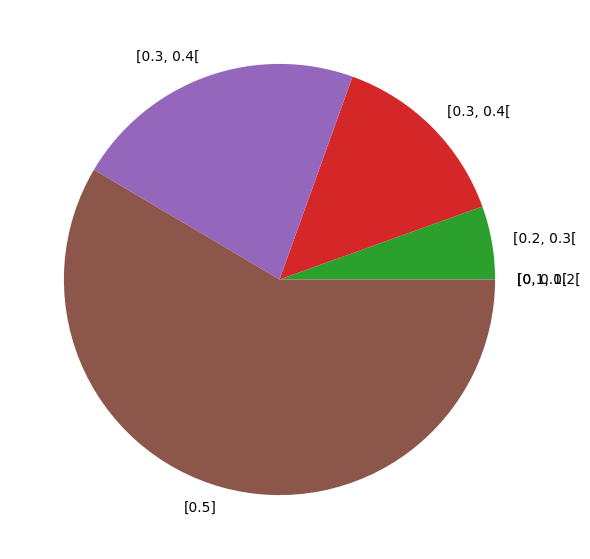

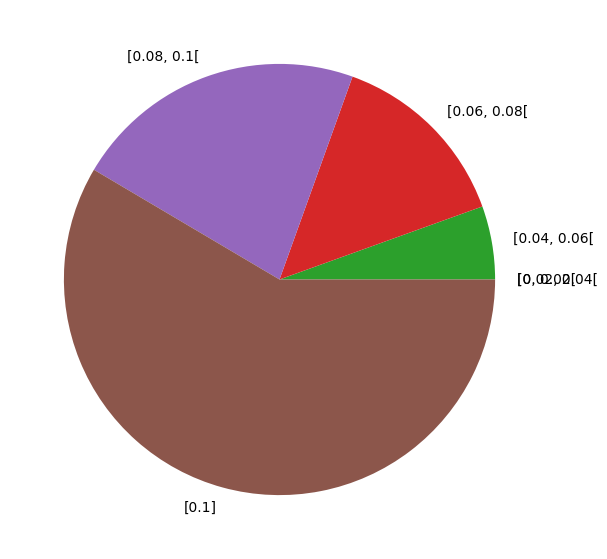



[2, 3, 6, 9, 1, 5, 7, 16, 8, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 4] 
 [0, 2, 3, 0, 6, 9, 0, 1, 0, 5, 7, 0, 16, 8, 0, 10, 11, 0, 12, 13, 0, 14, 15, 0, 17, 18, 19, 0, 20, 21, 0, 4, 0, 0, 0, 0, 0] 
 712338 0
[20, 21, 4, 2, 3, 6, 9, 1, 5, 7, 16, 8, 10, 11, 12, 13, 14, 15, 17, 18, 19] 
 [0, 20, 21, 0, 4, 2, 0, 3, 0, 6, 9, 0, 1, 5, 0, 7, 16, 0, 8, 10, 0, 11, 12, 13, 0, 14, 15, 0, 17, 0, 18, 19, 0, 0, 0, 0, 0] 
 741011 1
[20, 21, 4, 2, 3, 6, 9, 1, 5, 7, 16, 8, 10, 11, 12, 13, 14, 15, 17, 18, 19] 
 [0, 20, 21, 0, 4, 2, 0, 3, 0, 6, 9, 0, 1, 5, 0, 7, 16, 0, 8, 10, 0, 11, 12, 13, 0, 14, 15, 0, 17, 0, 18, 19, 0, 0, 0, 0, 0] 
 741011 2
[20, 21, 4, 2, 3, 6, 9, 1, 5, 7, 16, 8, 10, 11, 12, 13, 14, 15, 17, 18, 19] 
 [0, 20, 21, 0, 4, 2, 0, 3, 0, 6, 9, 0, 1, 5, 0, 7, 16, 0, 8, 10, 0, 11, 12, 13, 0, 14, 15, 0, 17, 0, 18, 19, 0, 0, 0, 0, 0] 
 741011 3
[20, 21, 4, 2, 3, 6, 9, 1, 5, 7, 16, 8, 10, 11, 12, 13, 14, 15, 17, 18, 19] 
 [0, 20, 21, 0, 4, 2, 0, 3, 0, 6, 9, 0, 1, 5, 0, 7, 16, 0, 8, 10, 0, 

In [5]:
#  funcion principal

generacion_poblacion_base = N_1()
vehicle_order = N_2()
poblacion_base_codificada = []
for poblacion_base in generacion_poblacion_base:
    poblacion_base_codificada.append(decodificar_pedidos(poblacion_base, vehicle_order, t_v_d, c_o_i_t_w))
for i in range(len(poblacion_base_codificada)):
    poblacion_base_codificada[i] = codificado_real(poblacion_base_codificada[i],vehicle_order)
lista_fitness = []
for i in poblacion_base_codificada:
    lista_fitness.append(i[2])
fitness_inicial = fitness_total(lista_fitness)

for i in range(len(poblacion_base_codificada)):
    poblacion_base_codificada[i] = [poblacion_base_codificada[i][0], poblacion_base_codificada[i][2], poblacion_base_codificada[i][3], poblacion_base_codificada[i][4]]
    
for i in range(len(poblacion_base_codificada)):
    poblacion_base_codificada[i][2] = cross_prob(poblacion_base_codificada[i][0][1], fitness_inicial[1], fitness_inicial[2])
    poblacion_base_codificada[i][3] = mut_prob(poblacion_base_codificada[i][0][1], fitness_inicial[1], fitness_inicial[2])
    
data = [poblacion_base_codificada, fitness_inicial, vehicle_order]

minimo = 99999999999999
pos_minimo = 0
for i in range(len(data[0])):
    if data[0][i][1] < minimo:
        minimo = data[0][i][1]
        pos_minimo = i
data_mejor = decodificar_pedidos(data[0][pos_minimo][0], data[2], t_v_d, c_o_i_t_w)
historial_fitness = [[data_mejor[0],data_mejor[1],minimo]]

print("-------------------------------------Inicio GA--------------------------------")
tiempos = [0,0,0,0] #Crossover,Mutation,LSO,re-procesamiento
t_i = 0
t_f = 0

gen = 0
while gen < pop_data[3]:
    print("---------------------------------Generacion",str(gen+1)+"--------------------------------")
    selected = seleccion(data[0])
    t_i = time.time()*1000.0
    data[1],data[0] = crossover(selected,data[1],data[0])
    t_f = time.time()*1000.0
    tiempos[0] += t_f-t_i
    t_i = time.time()*1000.0

    data[1],data[0] = mutacion(data[1],data[0])
    
    
    t_f = time.time()*1000.0
    tiempos[1] += t_f-t_i

    
    t_i = time.time()*1000.0
    mejorados = []
    for i in range(len(data[0])):
        lsp = randint(0, len(data[0][0])-2)
        pair = [data[0][i][0][lsp],data[0][i][0][lsp+1]]
        candidate = copy.deepcopy(data[0][i][0])
        candidate[lsp] = pair[1]
        candidate[lsp+1] = pair[0]
        temp = []
        temp = decodificar_pedidos(candidate,data[2],t_v_d, c_o_i_t_w)
        temp = codificado_real(temp,data[2])
        if temp[2] < data[0][i][1]:
            data[0][i] = [temp[0], temp[2], temp[3], temp[4]]
            mejorados.append(i)

    t_f = time.time()*1000.0
    tiempos[2] += t_f-t_i
    
    t_i = time.time()*1000.0

    total_fitness = []
    for i in range(len(data[0])):
        total_fitness.append(data[0][i][1])
    nuevo_fitness = fitness_total(total_fitness)
    for i in mejorados:
        data[0][i][2] = cross_prob(data[0][i][1], nuevo_fitness[1], nuevo_fitness[2])
        data[0][i][3] = mut_prob(data[0][i][1], nuevo_fitness[1], nuevo_fitness[2])
    
    data = [data[0], nuevo_fitness, data[2]]

    minimo = 99999999999999
    pos_minimo = 0
    for i in range(len(data[0])):
        if data[0][i][1] < minimo:
            minimo = data[0][i][1]
            pos_minimo = i
    data_mejor = decodificar_pedidos(data[0][pos_minimo][0], data[2], t_v_d, c_o_i_t_w)
    historial_fitness.append([data_mejor[0],data_mejor[1],minimo])
    #se ve como quedan los datos y se deja con el formato para el crossover
    gen += 1

    t_f = time.time()*1000.0
    tiempos[3] += t_f-t_i
probabilidades = [[],[]]
for i in range(len(data[0])):
    probabilidades[0].append(data[0][i][2])
    probabilidades[1].append(data[0][i][3])

import matplotlib.pyplot as plt
import numpy as np

frecuencias = [[],[],[],[],[],[]]
valores = ['[0, 0.1[', '[0.1, 0.2[', '[0.2, 0.3[','[0.3, 0.4[', '[0.3, 0.4[', '[0.5]']
for i in probabilidades[0]:
    if 0 < i < 0.1:
        frecuencias[0].append(i)
    if 0.1 < i < 0.2:
        frecuencias[1].append(i)
    if 0.2 < i < 0.3:
        frecuencias[2].append(i)
    if 0.3 < i < 0.4:
        frecuencias[3].append(i)
    if 0.4 < i < 0.5:
        frecuencias[4].append(i)
    if 0 < i == 0.5:
        frecuencias[5].append(i)
for i in range(len(frecuencias)):
    frecuencias[i] = len(frecuencias[i])
fig = plt.figure(figsize=(10, 7))
plt.pie(frecuencias,labels=valores)
plt.show()


frecuencias = [[],[],[],[],[],[]]
valores = ['[0, 0.02[', '[0.02, 0.04[', '[0.04, 0.06[','[0.06, 0.08[', '[0.08, 0.1[', '[0.1]']
for i in probabilidades[1]:
    if 0 < i < 0.02:
        frecuencias[0].append(i)
    if 0.02 < i < 0.04:
        frecuencias[1].append(i)
    if 0.04 < i < 0.06:
        frecuencias[2].append(i)
    if 0.06 < i < 0.08:
        frecuencias[3].append(i)
    if 0.08 < i < 0.1:
        frecuencias[4].append(i)
    if 0 < i == 0.1:
        frecuencias[5].append(i)
for i in range(len(frecuencias)):
    frecuencias[i] = len(frecuencias[i])
    #print(frecuencias[i])
fig = plt.figure(figsize=(10, 7))
plt.pie(frecuencias,labels=valores)
plt.show()
print("\n")
for i in range(len(historial_fitness)):
    print(historial_fitness[i][0],"\n",historial_fitness[i][1],"\n",int(historial_fitness[i][2]),i)
print("Tiempo Crossover:            ",tiempos[0]/1000.0)
print("Tiempo Mutacion:             ",tiempos[1]/1000.0)
print("Tiempo Local Search Operator:",tiempos[2]/1000.0)
print("Tiempo Re-procesamiento:     ",tiempos[3]/1000.0)